In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pump-sensor-data/sensor.csv


LET'S TRY SOME BASIC ANOMALY DETECTION ON PUMP-SENSOR-DATA

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [4]:
from sklearn.cluster import KMeans

Asset Management can exploit Sensor Data and do some kool anomaly detection using machine learning techniques!!

In [5]:
!ls

__notebook__.ipynb


In [6]:
df = pd.read_csv('/kaggle/input/pump-sensor-data/sensor.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

2 quick observation 
1. sensor 15 is use less
2. we have to do something for timestamp data type

In [7]:
del df['sensor_15']

In [8]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_16 

In [10]:
### one more unnecessary column
del df['Unnamed: 0']

Now ~ next problem is gonna be missing value!! got to do something 

In [11]:

df.nunique() ## many repeating value here

timestamp         220320
sensor_00           1253
sensor_01            831
sensor_02            831
sensor_03            588
sensor_04           7844
sensor_05         190751
sensor_06            812
sensor_07            531
sensor_08            626
sensor_09            565
sensor_10         198804
sensor_11         196368
sensor_12         187145
sensor_13         191983
sensor_14          94564
sensor_16         110522
sensor_17         148000
sensor_18         152603
sensor_19         100422
sensor_20          92129
sensor_21         131083
sensor_22         126401
sensor_23         119286
sensor_24         133778
sensor_25         165999
sensor_26         179718
sensor_27         203198
sensor_28         189278
sensor_29         201908
sensor_30           2070
sensor_31           2685
sensor_32         205414
sensor_33         200855
sensor_34         203895
sensor_35         201781
sensor_36         201437
sensor_37         188898
sensor_38            602
sensor_39            909


many redundant columns

In [12]:
##df.hist(df.columns, bins=25, layout=(8,7), figsize=(20, 18))
##plt.show() 
## not much info here 

let's drop duplicate rows first if any

In [13]:
df.shape

(220320, 53)

In [14]:
df = df.drop_duplicates()
df.shape

(220320, 53)

this is common practice in missing value analyses -- top n column with highest missing values 

In [15]:
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]

calc_percent_NAs(df).head(10)

,percent
sensor_50,0.349569
sensor_51,0.069821
sensor_00,0.046333
sensor_07,0.024741
sensor_08,0.023180
sensor_06,0.021777
sensor_09,0.020856
sensor_01,0.001675
sensor_30,0.001185
sensor_29,0.000327


we are following very simple imputation strategy over here (there are many shopisticated ones)
mean imputation for all columns that have more than 1% missing value 
(also one can remove the entire column if it has let's say more than 60% missing value. The upper limit is more of heuristic and experience based.)

In [16]:
#better code is required
df['sensor_50'].fillna((df['sensor_50'].mean()), inplace=True)
df['sensor_51'].fillna((df['sensor_51'].mean()), inplace=True)
df['sensor_00'].fillna((df['sensor_00'].mean()), inplace=True)
df['sensor_08'].fillna((df['sensor_08'].mean()), inplace=True)
df['sensor_07'].fillna((df['sensor_07'].mean()), inplace=True)
df['sensor_06'].fillna((df['sensor_06'].mean()), inplace=True)
df['sensor_09'].fillna((df['sensor_09'].mean()), inplace=True)

In [17]:
calc_percent_NAs(df).head(10)

,percent
sensor_01,0.001675
sensor_30,0.001185
sensor_29,0.000327
sensor_32,0.000309
sensor_18,0.000209
sensor_17,0.000209
sensor_22,0.000186
sensor_25,0.000163
sensor_16,0.000141
sensor_45,0.000123


In [18]:
df = df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219521 entries, 0 to 220319
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       219521 non-null  object 
 1   sensor_00       219521 non-null  float64
 2   sensor_01       219521 non-null  float64
 3   sensor_02       219521 non-null  float64
 4   sensor_03       219521 non-null  float64
 5   sensor_04       219521 non-null  float64
 6   sensor_05       219521 non-null  float64
 7   sensor_06       219521 non-null  float64
 8   sensor_07       219521 non-null  float64
 9   sensor_08       219521 non-null  float64
 10  sensor_09       219521 non-null  float64
 11  sensor_10       219521 non-null  float64
 12  sensor_11       219521 non-null  float64
 13  sensor_12       219521 non-null  float64
 14  sensor_13       219521 non-null  float64
 15  sensor_14       219521 non-null  float64
 16  sensor_16       219521 non-null  float64
 17  sensor_17 

guess we are ready.
make df a time seires first. set date as index.

In [20]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [21]:
df = df.set_index('timestamp')

In [22]:
df.head() ## our time series is ready!! congrats

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


DON'T FORGET THE OUTLIERS!! THEY ARE THE ONES WHO MIGHT HAVE PLAYED ROLE IN ANOMALY....
SIMPLY REMOVING THEM MIGHT NOT BE A VERY GOOD IDEA

LET'S HAVE A LOOK AT MACHINE STATUS FIRST

In [23]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

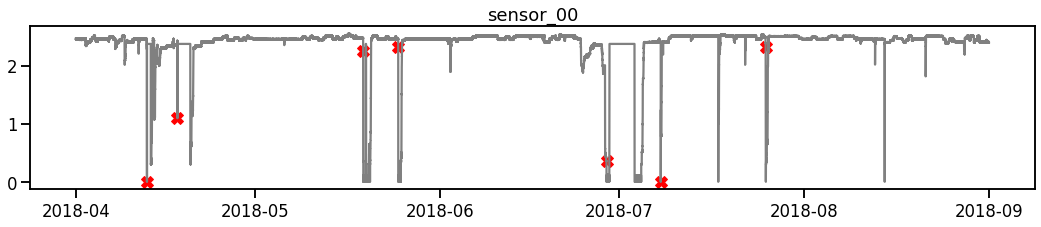

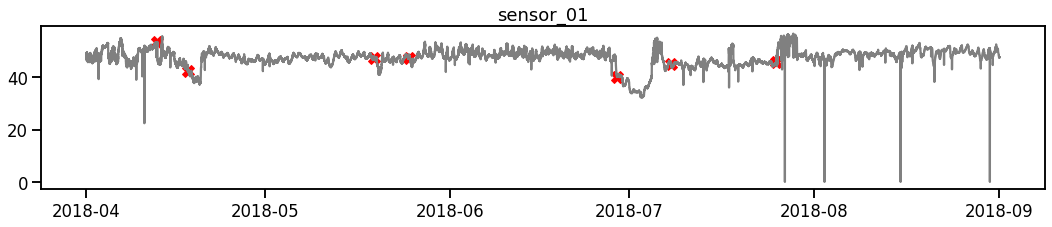

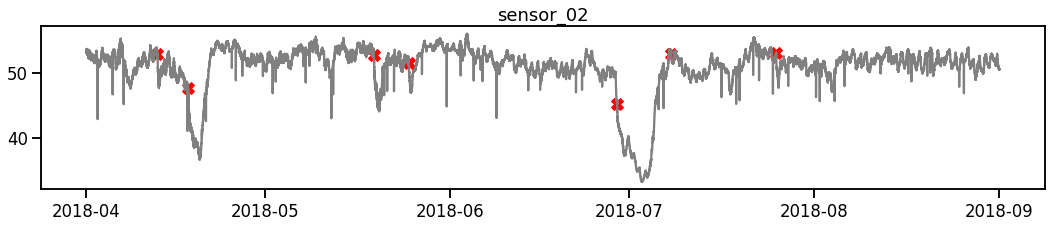

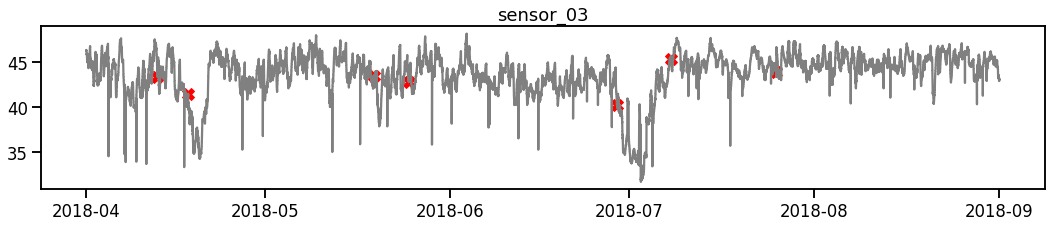

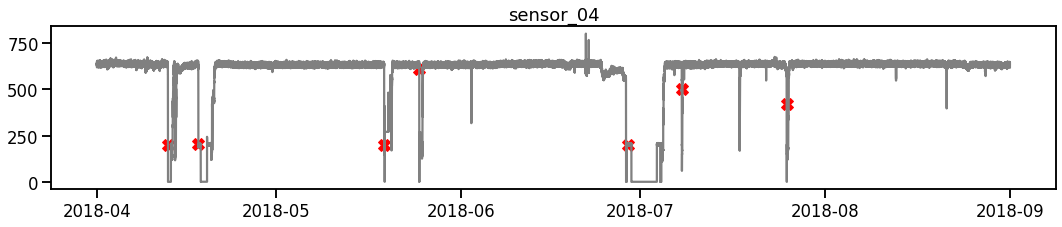

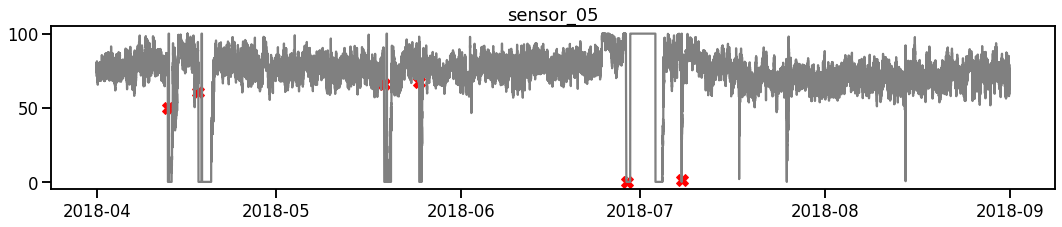

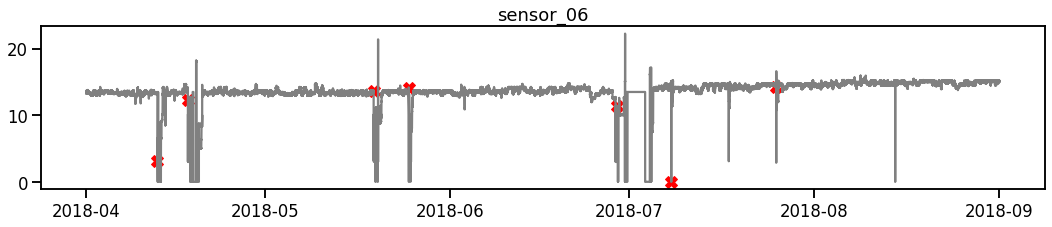

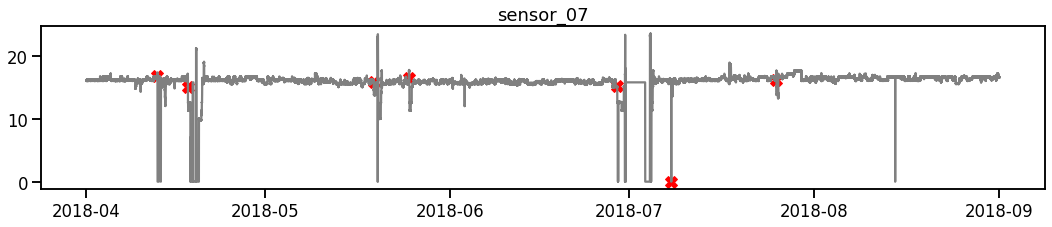

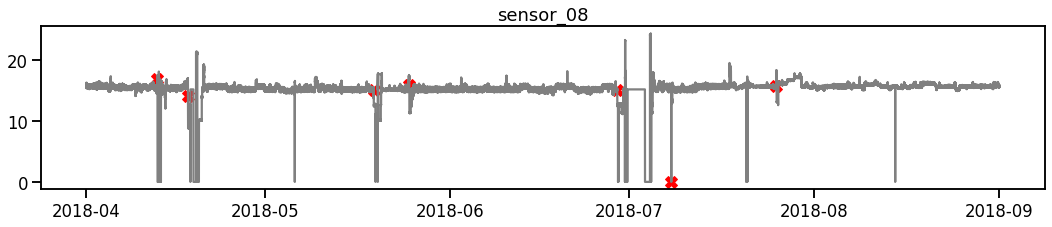

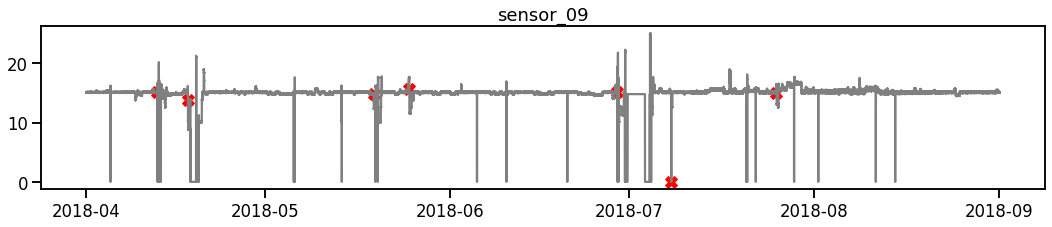

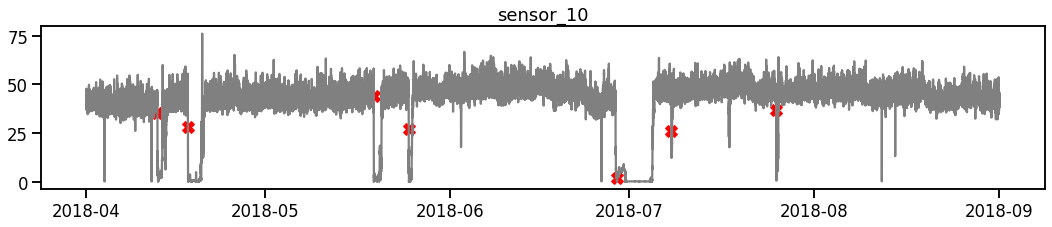

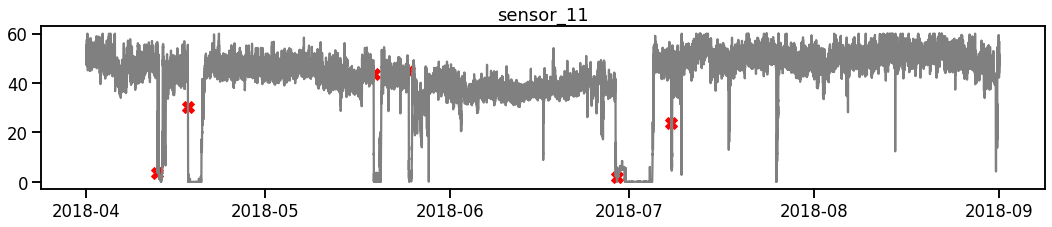

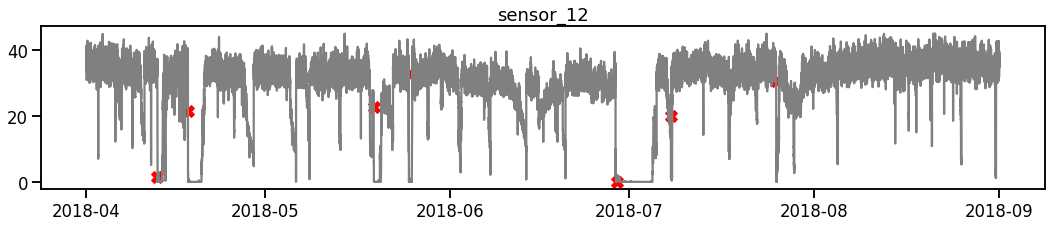

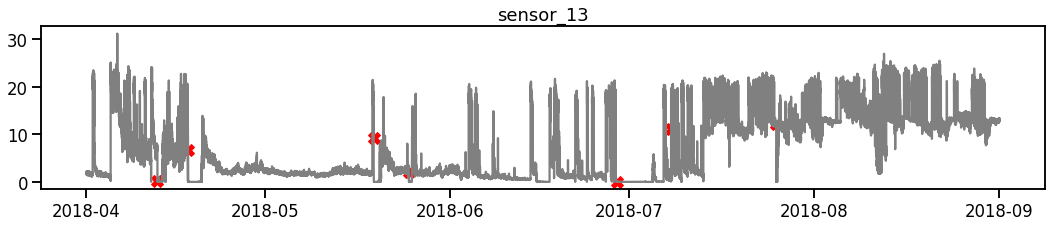

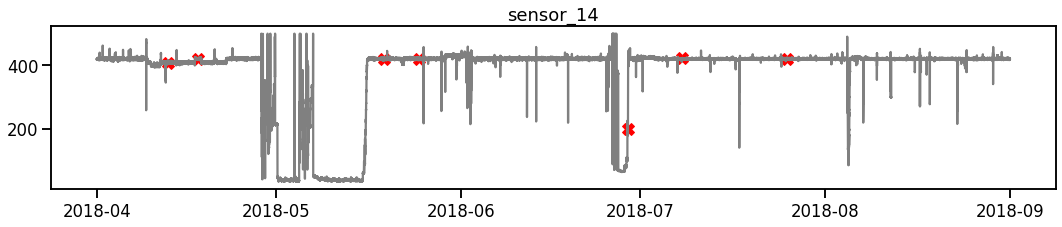

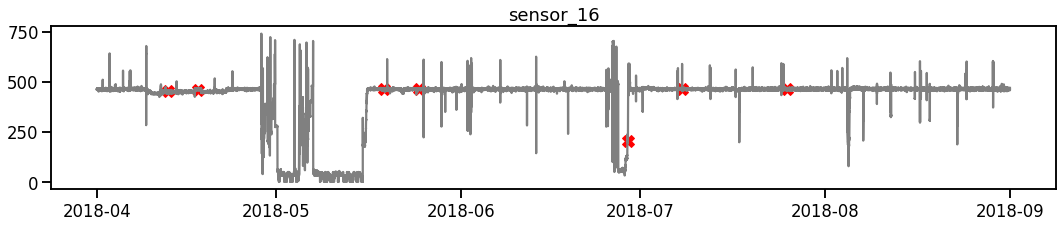

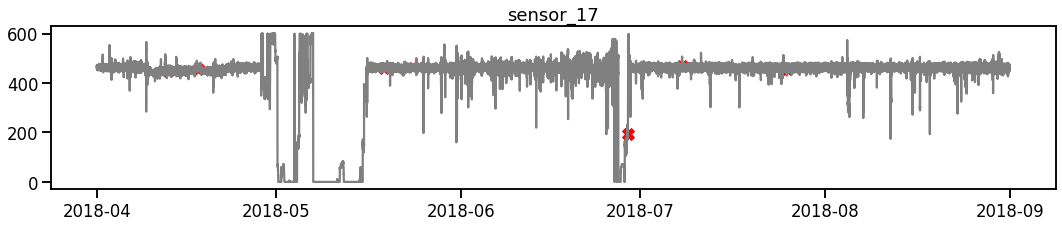

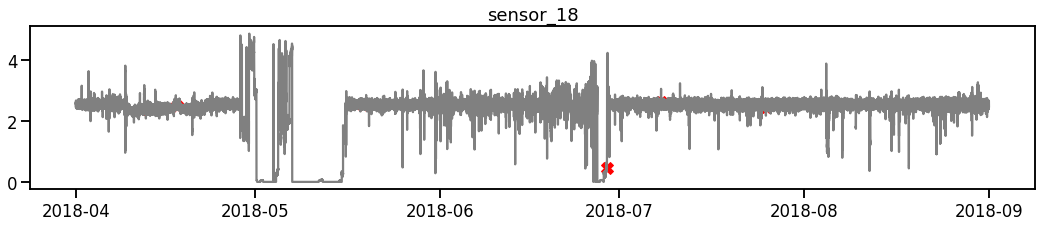

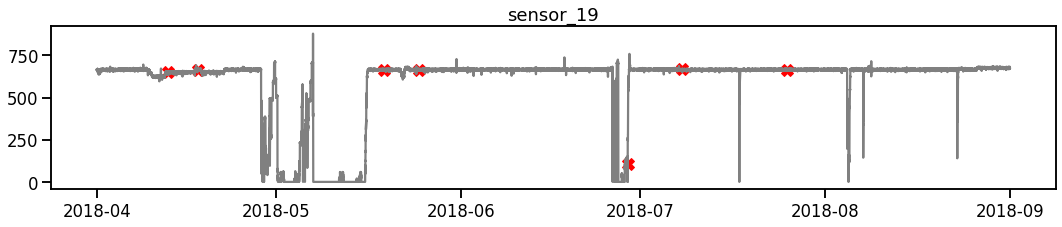

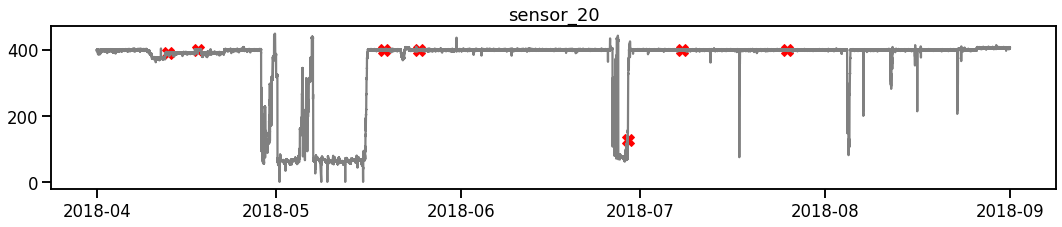

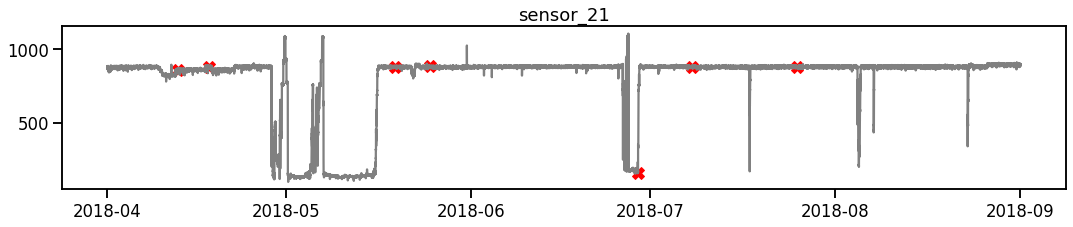

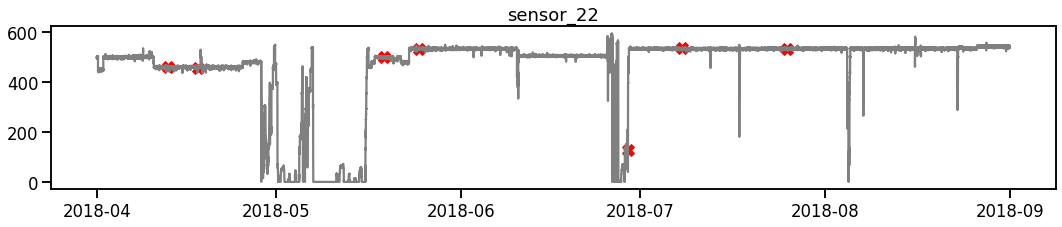

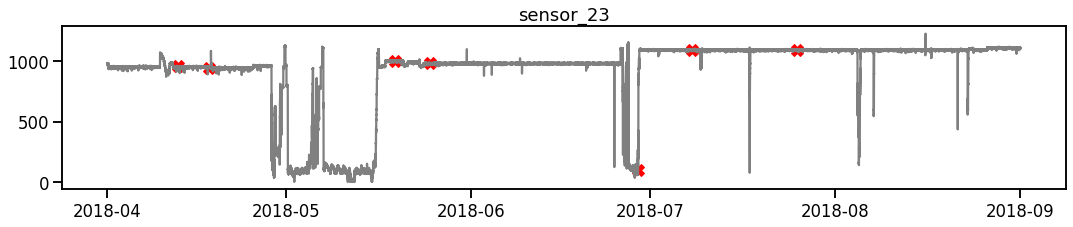

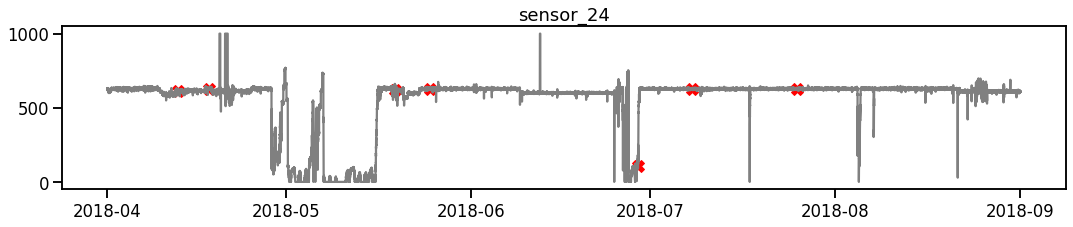

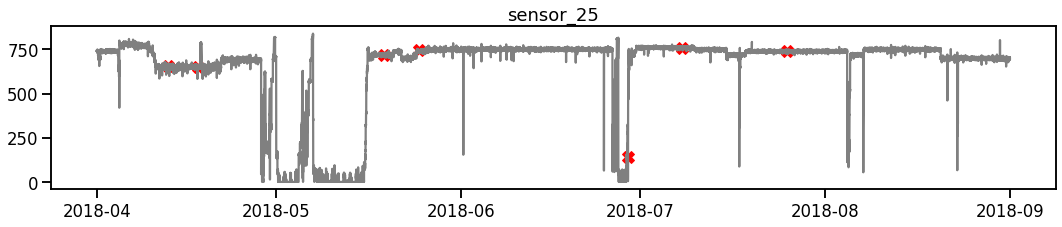

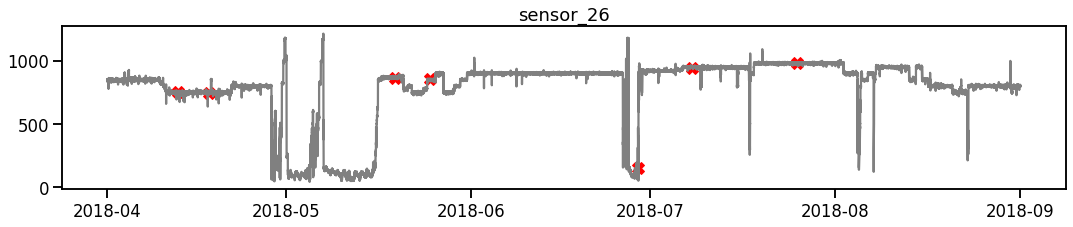

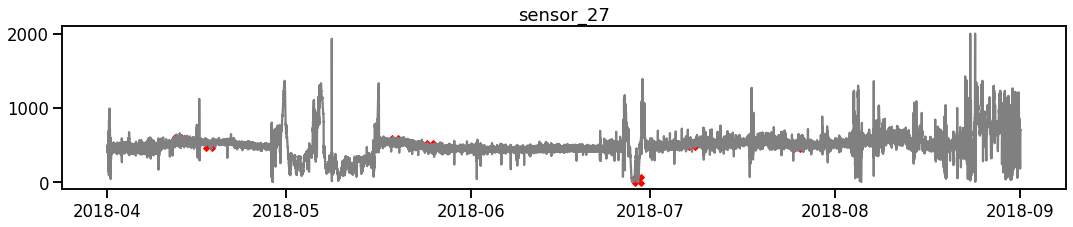

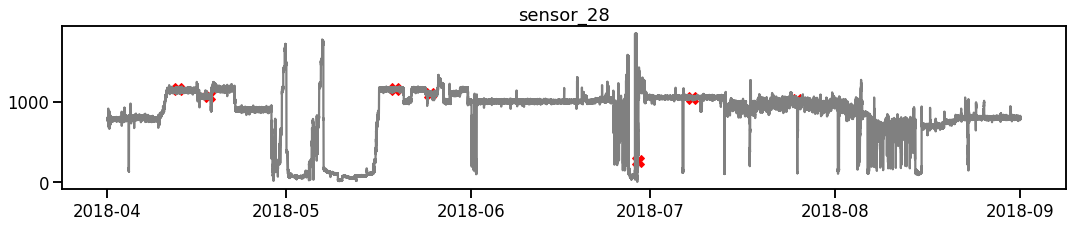

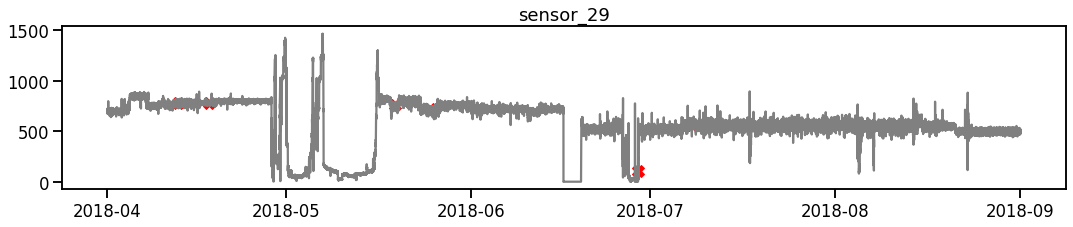

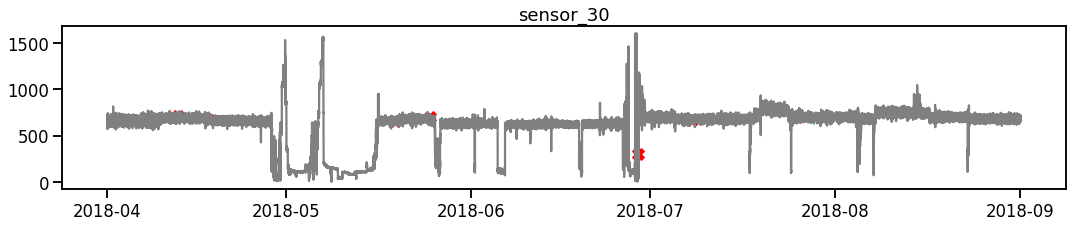

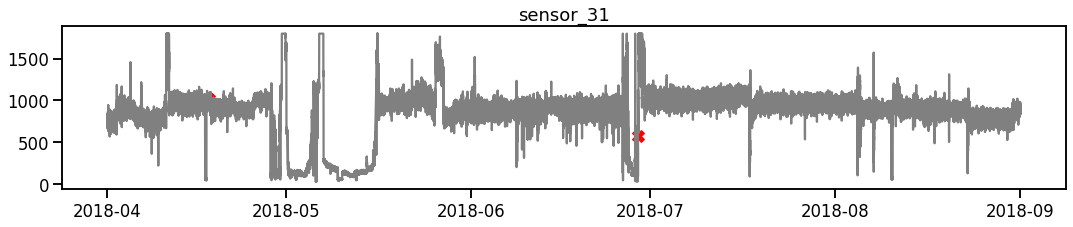

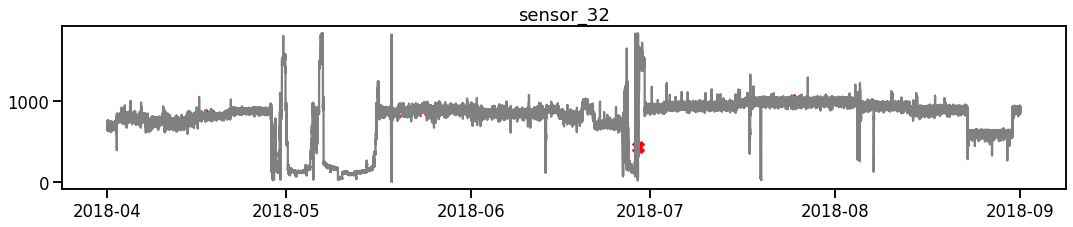

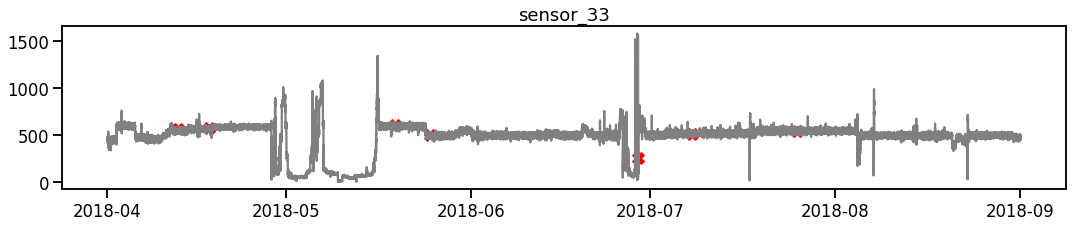

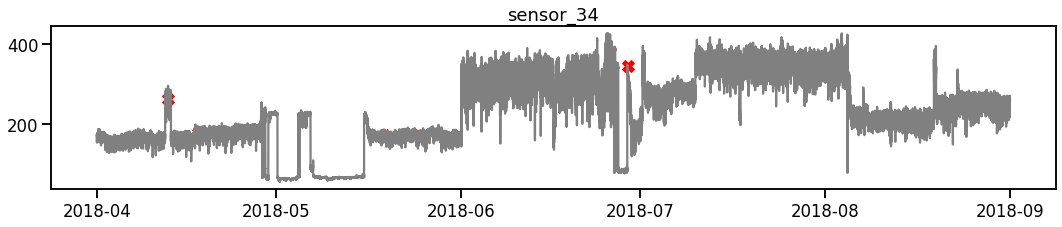

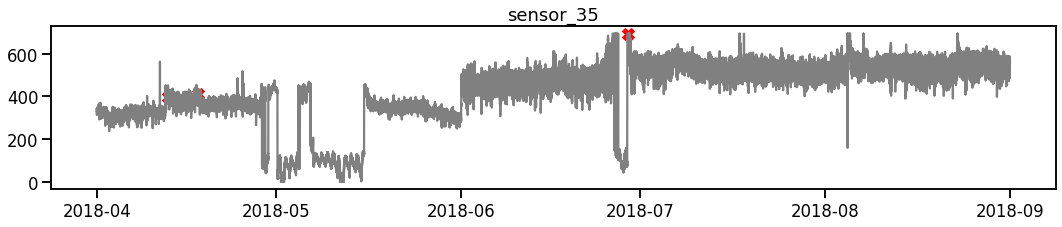

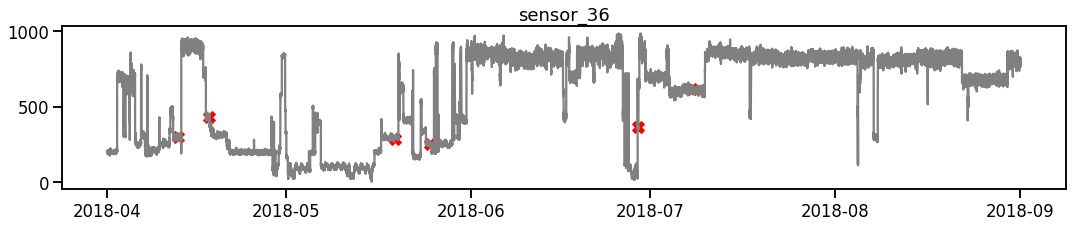

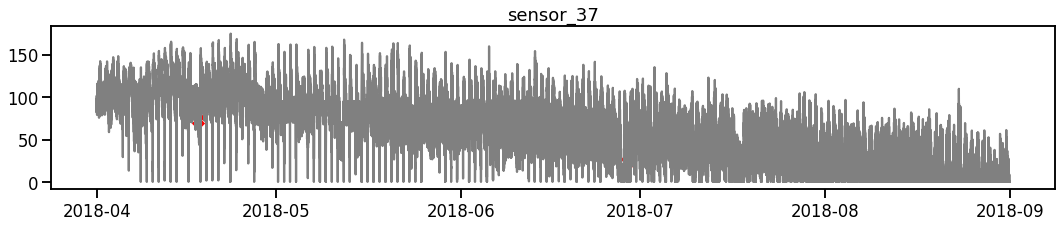

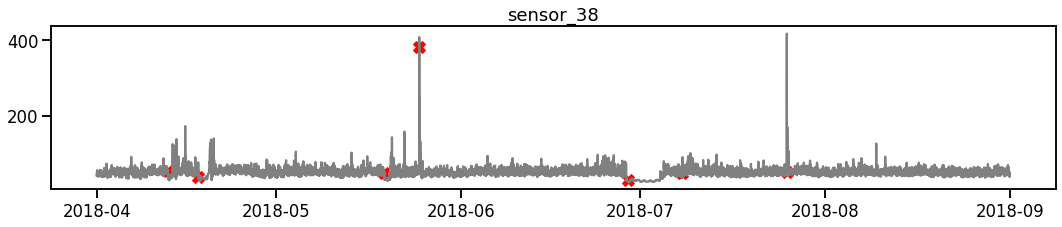

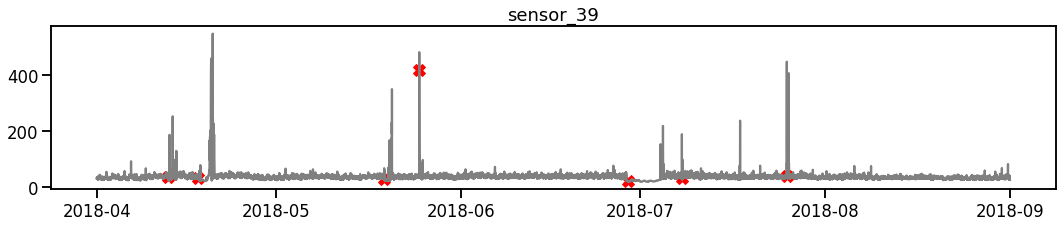

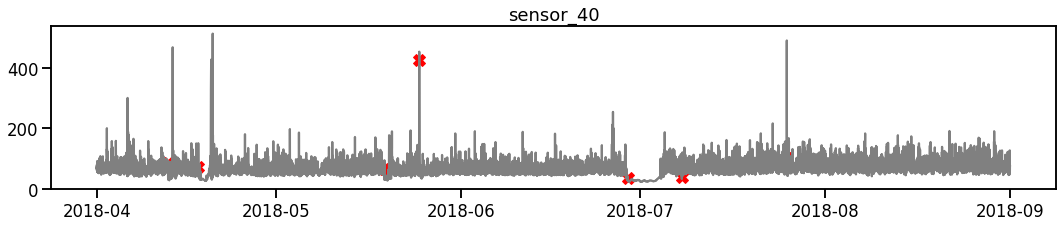

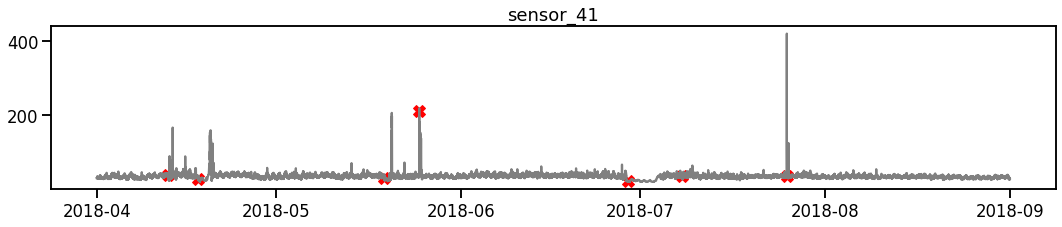

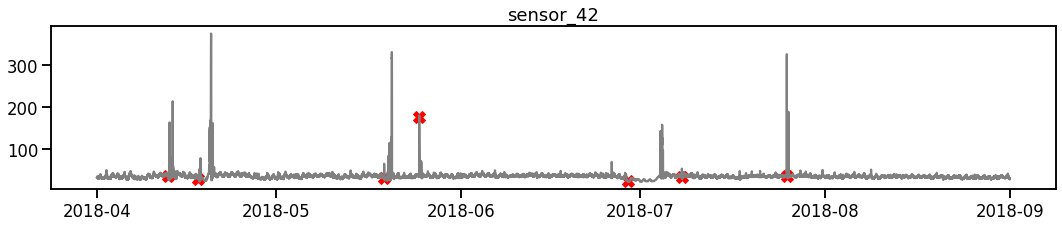

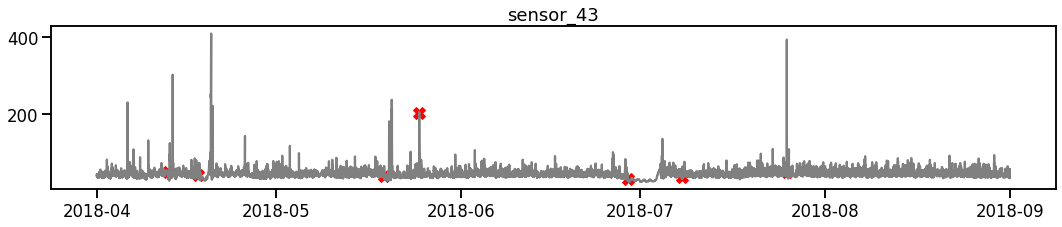

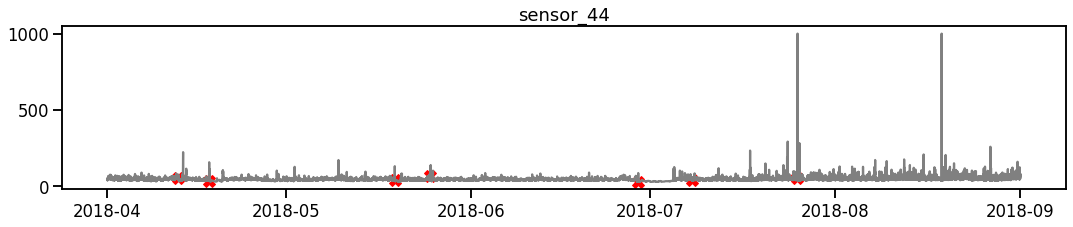

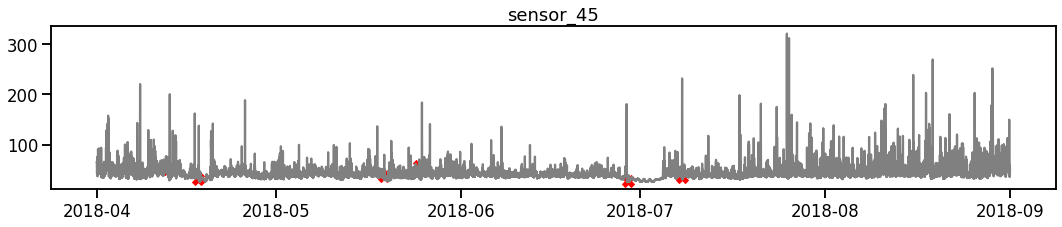

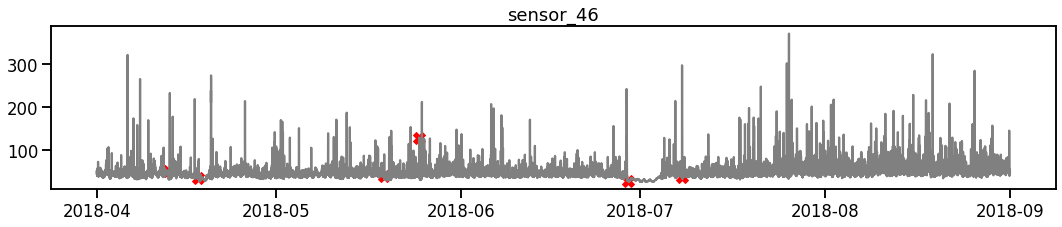

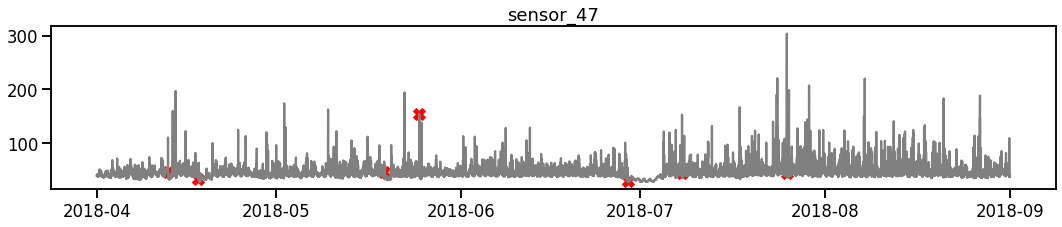

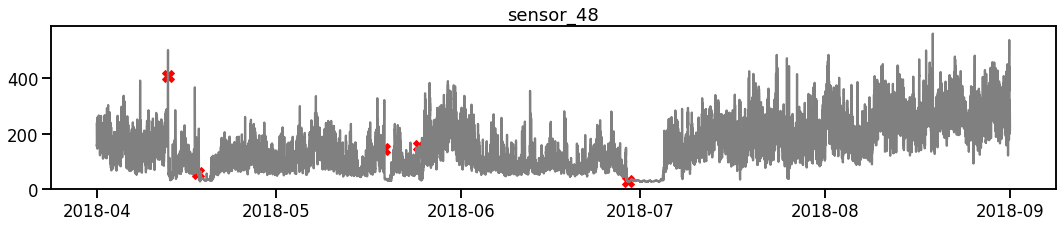

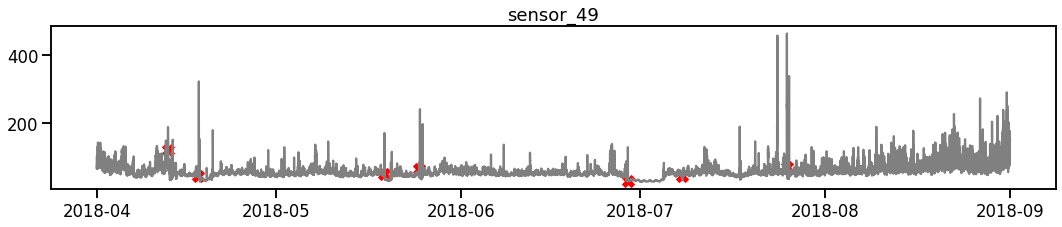

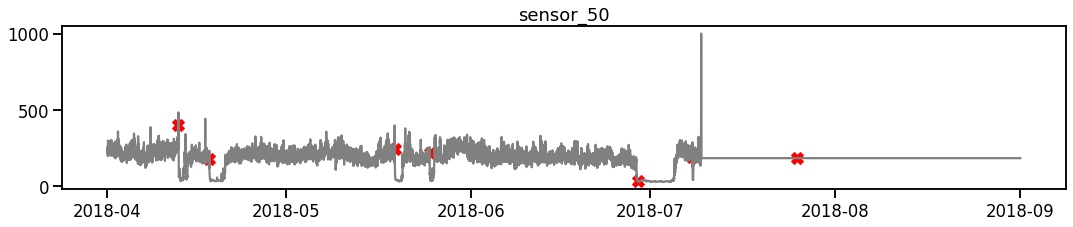

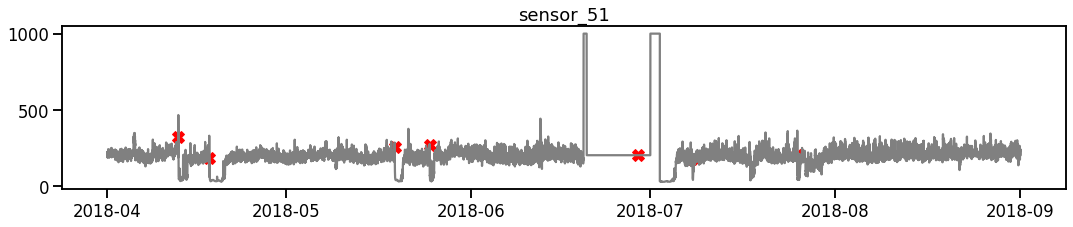

In [24]:

dfBroken = df[df['machine_status']=='BROKEN']
dfSensors = df.drop(['machine_status'], axis=1)
sensorNames=dfSensors.columns
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(dfBroken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[sensor], color='grey')
    _ = plt.title(sensor)
    plt.show()

I WILL NOT CHECK THE STATIONARITY OF THIS LONG SIRIES. 
AGAIN FROM MY MULTIPLE YEARS IN TIME SERIES ALMOST ALL HIGH FREQUENCY LONG TIME SERIES WILL PASS THE STATIONARY TEST. YOU CAN CHECK THIS. FOR LONG SERIES OF HIGH FREQUENCY DATA ECONOMERTICIAN SHOULD BETTER COME WITH NEW TEST RATHER THAN RELYING UPON TRADITIONAL ONES WHICH WORKS PERFECTLY ON LOW FREQUENCY DATA WITH LESS RECORDS.

NOW SOME DIMENSION REDUCTION -- WILL GO AHEAD WITH PCA BUT SOON WRITE ANOTHER NOTEBOOK ON TICK (CLUSTERING). HAVE SEEN IT'S USE GETTING POPULAR IN INDUSTRY.

In [25]:
x = df[sensorNames]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

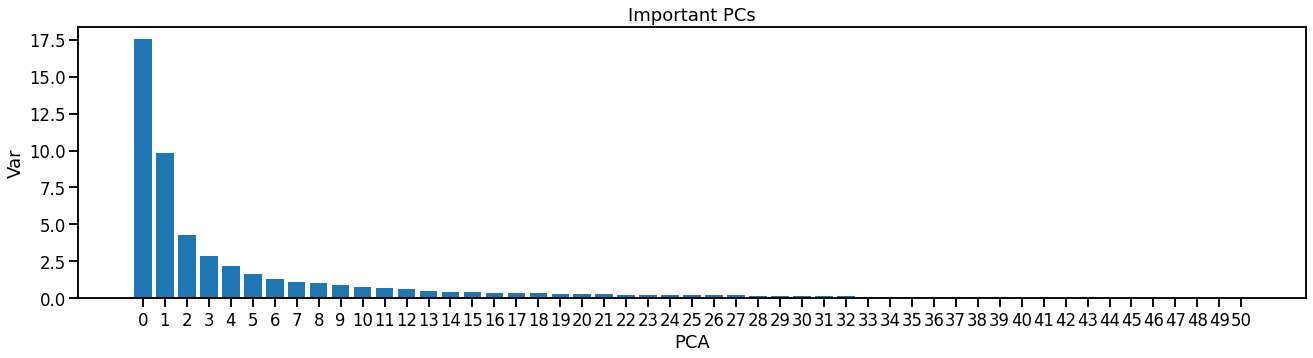

In [26]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA')
_ = plt.ylabel('Var')
_ = plt.xticks(features)
_ = plt.title("Important PCs")
plt.show()

I WPN'T CHECK FOR AUTO-CORRELATION IN PCs (WHY? THEY ARE ORTHOGONAL)
WHAT ABOUT STATIONARITY AGAIN ADF WILL SAY THEY STATIONAY (CHECK IT IF YOU LIKE) 

In [27]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC0', 'PC1','PC2'])

In [28]:
df['PC0']=pd.Series(principalDf['PC0'].values, index=df.index)
df['PC1']=pd.Series(principalDf['PC1'].values, index=df.index)
df['PC2']=pd.Series(principalDf['PC2'].values, index=df.index)

IQR BEFORE ANYTHING

In [29]:
#  for PC0
q1_pc1, q3_pc1 = df['PC0'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

#PC1
q1_pc2, q3_pc2 = df['PC1'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)
#PC2
q1_pc3, q3_pc3 = df['PC2'].quantile([0.25, 0.75])
iqr_pc3 = q3_pc3 - q1_pc3
lower_pc3 = q1_pc3 - (1.5*iqr_pc3)
upper_pc3 = q3_pc3 + (1.5*iqr_pc3)

In [30]:
print(lower_pc1, upper_pc1)
print(lower_pc2, upper_pc2)
print(lower_pc3, upper_pc3)

-736.3329510286119 222.73590494562325
-738.23647308791 683.9742727011852
-345.2817827908078 324.5495724553019


In [31]:
df['anomaly_pc1'] = ((df['PC0']>upper_pc1) | (df['PC0']<lower_pc1)).astype('int')
df['anomaly_pc2'] = ((df['PC1']>upper_pc2) | (df['PC1']<lower_pc2)).astype('int')
df['anomaly_pc3'] = ((df['PC2']>upper_pc3) | (df['PC2']<lower_pc3)).astype('int')

In [32]:
print(df['anomaly_pc1'].value_counts())
print(df['anomaly_pc2'].value_counts())
print(df['anomaly_pc3'].value_counts())

0    189644
1     29877
Name: anomaly_pc1, dtype: int64
0    217947
1      1574
Name: anomaly_pc2, dtype: int64
0    203770
1     15751
Name: anomaly_pc3, dtype: int64


In [33]:
outliers_pc1 = df.loc[(df['PC0']>upper_pc1) | (df['PC0']<lower_pc1), 'PC0']
outliers_pc2 = df.loc[(df['PC1']>upper_pc2) | (df['PC1']<lower_pc2), 'PC1']
outliers_pc3 = df.loc[(df['PC2']>upper_pc3) | (df['PC2']<lower_pc3), 'PC2']

In [34]:
print(len(outliers_pc1)/len(df))
print(len(outliers_pc2)/len(df))
print(len(outliers_pc3)/len(df))

0.13610087417604694
0.0071701568414866915
0.0717516775160463


let's see what appears to be best three features if machine status is our variable of intrest

In [35]:
# Apply SelectKBest class to extract the best 3 features - Univariate feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
x = df.drop(['machine_status', 'PC0','PC1' ,'PC2', 'anomaly_pc1', 'anomaly_pc2', 'anomaly_pc3'], axis=1)
y = df['machine_status']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(x_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

      Feature         Score
11  sensor_11  10106.761967
12  sensor_12   9879.052739
4   sensor_04   8167.176442


LET'S TRY FIGURE HOW PCs PERFORMED 

MANY SUCH COMBOS MIGHT BRING OUT BETTER INSIGHTS

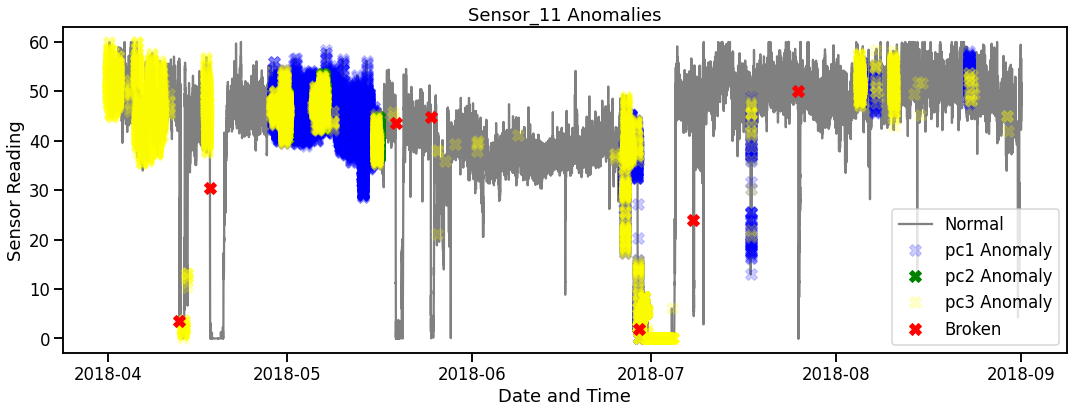

In [36]:

#PC3 ANOMALY on sensor_11 AND WHEN ACTUAL BREAK HAPPENED
a = df[df['anomaly_pc1'] == 1] #anomaly
b = df[df['anomaly_pc2'] == 1]
c = df[df['anomaly_pc3'] == 1]
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_11'], color='grey', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='blue', markersize=12, label='pc1 Anomaly', alpha = 0.2)
_ = plt.plot(b['sensor_11'], linestyle='none', marker='X', color='green', markersize=12, label='pc2 Anomaly')
_ = plt.plot(c['sensor_11'], linestyle='none', marker='X', color='yellow', markersize=12, label='pc3 Anomaly', alpha=0.2)
_ = plt.plot(dfBroken['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

of course PC2 and PC3 DOMINATES on sensor 11

NOW LET'S TRY K-MEANS

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

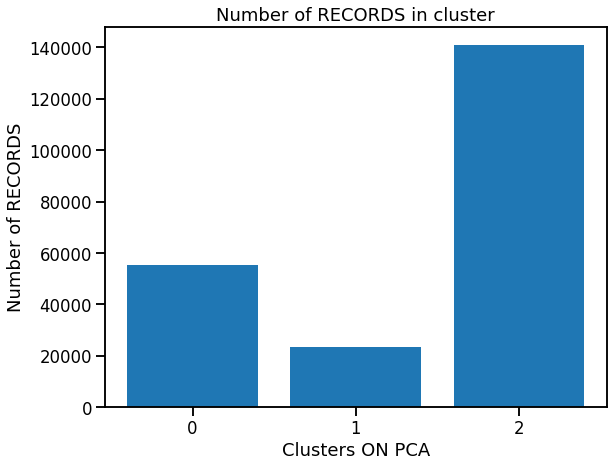

In [38]:

_ = plt.figure(figsize = (9, 7))
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
_ = plt.xlabel('Clusters ON PCA')
_ = plt.ylabel('Number of RECORDS')
_ = plt.title('Number of RECORDS in cluster')
plt.show()

In [39]:
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219521 entries, 0 to 219520
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC0     219521 non-null  float64
 1   PC1     219521 non-null  float64
 2   PC2     219521 non-null  float64
dtypes: float64(3)
memory usage: 5.0 MB


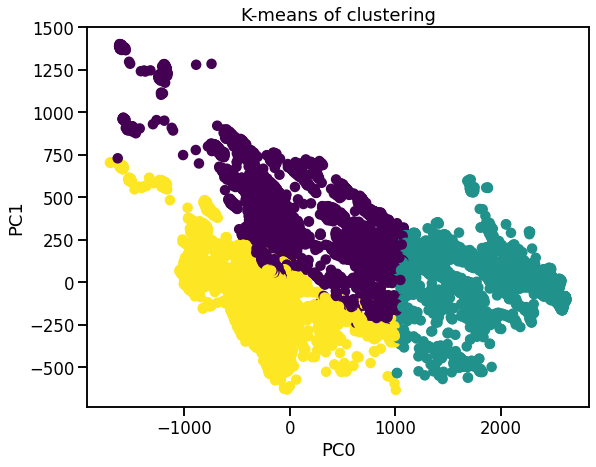

In [40]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['PC0'], principalDf['PC1'], c=labels)
_ = plt.xlabel('PC0')
_ = plt.ylabel('PC1')
_ = plt.title('K-means of clustering')
plt.show()

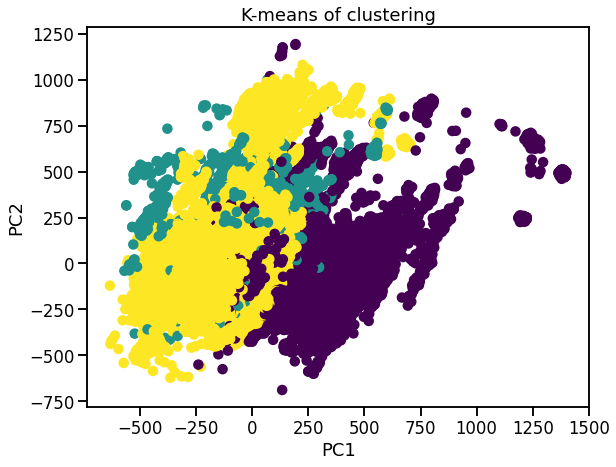

In [41]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['PC1'], principalDf['PC2'], c=labels)
_ = plt.xlabel('PC1')
_ = plt.ylabel('PC2')
_ = plt.title('K-means of clustering')
plt.show()

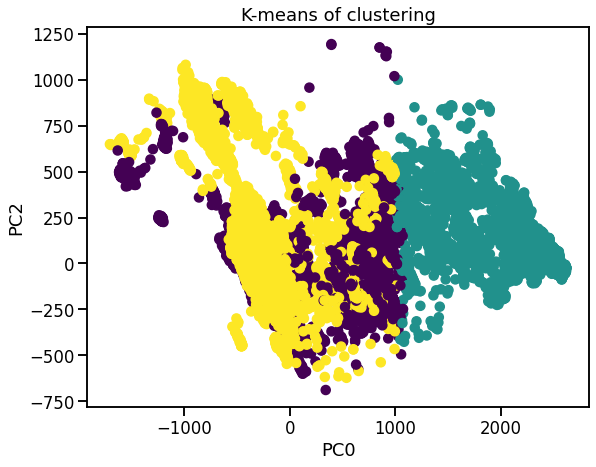

In [42]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['PC0'], principalDf['PC2'], c=labels)
_ = plt.xlabel('PC0')
_ = plt.ylabel('PC2')
_ = plt.title('K-means of clustering')
plt.show()

In [43]:

from mpl_toolkits import mplot3d

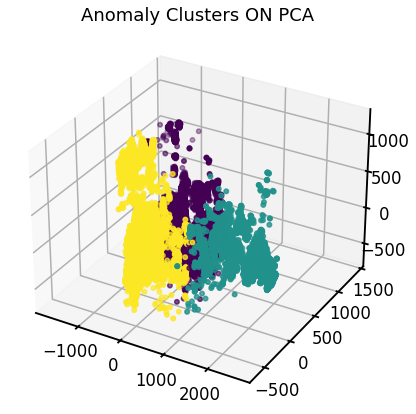

In [44]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(principalDf['PC0'], principalDf['PC1'], principalDf['PC2'], c=labels)
plt.title("Anomaly Clusters ON PCA")
 
# show plot
plt.show()

3D plots looks ok!! we can create k=2 clusters as well!! for broken or not-broken 

LETS CHECK DISTANCE FROM NEAREST CENTROID

In [45]:

def getDistanceByPoint(data, model):
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

LET'S FIND A THRESHOLD DISTANCE

In [46]:
distance = getDistanceByPoint(principalDf, kmeans)

In [47]:
outliers_fraction = 0.11
number_of_outliers = int(outliers_fraction*len(distance))

In [48]:

threshold = distance.nlargest(number_of_outliers).min()

In [49]:
#(0:normal, 1:anomaly) 
principalDf['anomalyDist'] = (distance >= threshold).astype(int)

In [50]:
principalDf['anomalyDist'].value_counts()

0    195374
1     24147
Name: anomalyDist, dtype: int64

In [51]:
df['anomalyDist'] = pd.Series(principalDf['anomalyDist'].values, index=df.index)

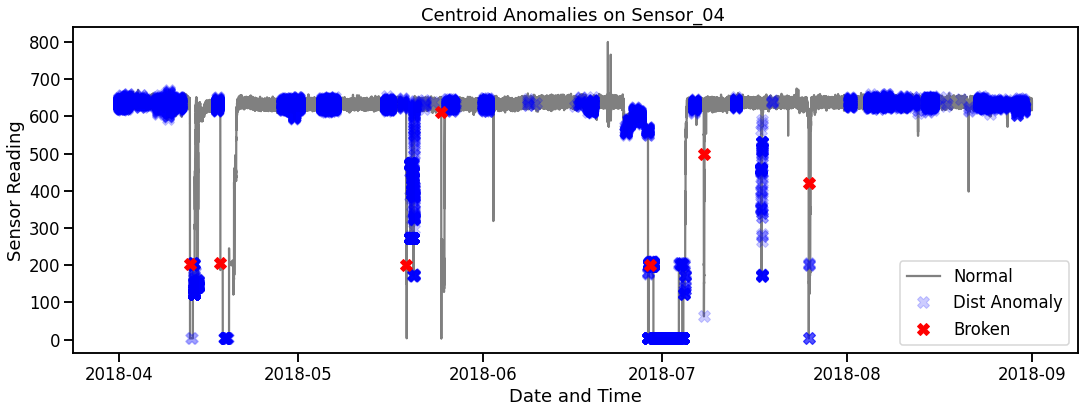

In [52]:
a = df[df['anomalyDist'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_04'], color='grey', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='blue', markersize=12, label='Dist Anomaly', alpha= 0.2)
_ = plt.plot(dfBroken['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Centroid Anomalies on Sensor_04 ')
_ = plt.legend(loc='best')
plt.show();

ABOVE PICS SHOW DISTANCE BASED ANOMALIES MISSED A LOT OF BROKEN MACHINE STATUS 

In [53]:
df[df['anomalyDist']==1]['machine_status'].value_counts()

NORMAL        20636
RECOVERING     3510
BROKEN            1
Name: machine_status, dtype: int64

In [54]:
df['machine_status'].value_counts()

NORMAL        205067
RECOVERING     14447
BROKEN             7
Name: machine_status, dtype: int64

COULD CAPTURE 1 OF 7

LET'S TAKE HELP OF SCI-KIT

In [55]:
from sklearn.ensemble import IsolationForest
outliers_fraction = 0.11 ## why
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomalyForest'] = pd.Series(model.predict(principalDf.values)) ### here -1 is anomaly

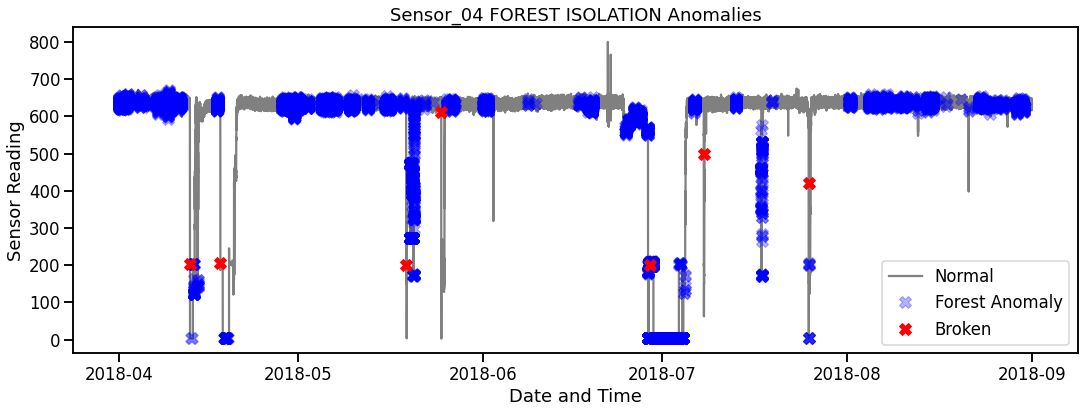

In [56]:
df['anomalyForest'] = pd.Series(principalDf['anomalyForest'].values, index=df.index)
a = df.loc[df['anomalyForest'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_04'], color='grey', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='blue', markersize=12, label='Forest Anomaly', alpha=0.3)
_ = plt.plot(dfBroken['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_04 FOREST ISOLATION Anomalies')
_ = plt.legend(loc='best')
plt.show();

COMPARE THE HITS AND MISSES OF LAST TWO GRAPHS!! SCI-KIT FOREST ISOLATION WINS....

INTERM OF NUMBERS 

In [57]:
df['anomalyForest'].value_counts()

 1    195373
-1     24148
Name: anomalyForest, dtype: int64

In [58]:
df[df['anomalyForest']==1]['machine_status'].value_counts()

NORMAL        183725
RECOVERING     11642
BROKEN             6
Name: machine_status, dtype: int64

In [59]:
df['machine_status'].value_counts()

NORMAL        205067
RECOVERING     14447
BROKEN             7
Name: machine_status, dtype: int64

6 of 7 TIMES| NOT BAD FOREST ISOLATION ||